# MolPCBA Dataset

Before running this notebook, make sure to run the `OGBG-MolPCBA_inspecting.ipynb` notebook with the same `PROTEIN_NR` value. This will generate the necessary pickle file for this notebook.

In [1]:
import pandas as pd
import networkx as nx
import pickle as pkl
import matplotlib.pyplot as plt
from methods import find_groups

In [2]:
"""Set protein number"""
PROTEIN_NR = 349519

In [3]:
pkl_filename = f"graph_{PROTEIN_NR}_OGBG.pkl"

with open(pkl_filename, 'rb') as pkl_input:
    graph = pkl.load(pkl_input)

edge_index = graph['edge_index']
num_nodes = graph['num_nodes']

G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

In [4]:
attributes = graph['node_feat']
lu = pd.DataFrame(attributes)
lu['target'] = lu[0] >= 6

In [5]:
result = find_groups(G, 20, lu, ablation_mode=False, use_multiprocessing=False)

100%|██████████| 332/332 [01:38<00:00,  3.38it/s]


In [6]:
result

,rho,sigma,q,ranks,reference,subgroup
node,,,,,,
46,9,3,0.320750,"[(46, False), (44, False), (47, False), (45, T...","[46, 44, 47, 45, 42, 49, 48, 41, 43]","[46, 44, 47]"
28,14,5,0.230508,"[(28, True), (27, False), (26, True), (29, Fal...","[28, 27, 26, 29, 33, 25, 30, 22, 20, 34, 23, 2...","[28, 27, 26, 29, 33]"
34,13,5,0.228987,"[(34, False), (33, True), (35, True), (36, Fal...","[34, 33, 35, 36, 41, 37, 32, 29, 27, 38, 42, 3...","[34, 33, 35, 36, 41]"
11,11,7,0.207201,"[(11, True), (12, False), (8, False), (6, Fals...","[11, 12, 8, 6, 13, 9, 14, 5, 19, 7, 10]","[11, 12, 8, 6, 13, 9, 14]"
253,22,13,0.206959,"[(253, False), (255, True), (254, True), (247,...","[253, 255, 254, 247, 246, 248, 256, 244, 261, ...","[253, 255, 254, 247, 246, 248, 256, 244, 261, ..."
167,5,3,0.206559,"[(167, True), (168, False), (166, False), (169...","[167, 168, 166, 169, 170]","[167, 168, 166]"
268,5,3,0.206559,"[(268, True), (269, False), (267, False), (270...","[268, 269, 267, 270, 271]","[268, 269, 267]"
299,19,11,0.192952,"[(299, False), (301, True), (300, True), (294,...","[299, 301, 300, 294, 293, 295, 302, 291, 296, ...","[299, 301, 300, 294, 293, 295, 302, 291, 296, ..."
180,5,4,0.178885,"[(180, False), (179, False), (181, False), (17...","[180, 179, 181, 178, 182]","[180, 179, 181, 178]"


In [7]:
output = pd.DataFrame()
output['Prototype'] = result.index
output.index = result.index
output['Rho'] = result['rho']
output['Sigma'] = result['sigma']
output['Q'] = result['q']
output['Ranks'] = result['ranks']
output.index.name = None
output[0:5].to_latex()

'\\begin{tabular}{lrrrrl}\n\\toprule\n & Prototype & Rho & Sigma & Q & Ranks \\\\\n\\midrule\n46 & 46 & 9 & 3 & 0.320750 & [(46, False), (44, False), (47, False), (45, True), (42, False), (49, True), (48, True), (41, True), (43, True), (36, False), (37, False), (34, False), (38, False), (33, True), (35, True), (32, False), (29, False), (40, True), (39, True), (30, False), (31, False), (27, False), (26, True), (28, True), (25, False), (22, False), (23, False), (24, False), (20, False), (19, True), (21, True), (14, False), (15, False), (12, False), (16, False), (11, True), (13, True), (17, False), (18, False), (8, False), (9, False), (6, False), (10, True), (5, True), (7, True), (4, False), (2, False), (50, False), (1, False), (3, False), (52, True), (51, True), (0, False), (53, False), (54, False), (58, False), (55, False), (60, True), (59, True), (61, False), (57, True), (56, True), (62, False), (66, False), (63, False), (68, True), (67, True), (64, False), (65, False), (69, False), (3

In [8]:
csv_filename = f'subgroups_graph_{PROTEIN_NR}_OGBG.csv'
output.to_csv(csv_filename)

In [9]:
lu['color'] = 'Skyblue'
lu.loc[lu['target'], 'color'] = 'Red'

In [10]:
def change_value(rho_val, prototype):
    ranks = result.loc[prototype, 'ranks']
    reference_group = [x[0] for x in ranks[0:int(rho_val)]]

    lu.loc[reference_group, 'color'] = 'Green'
    return None

In [11]:
lu['color'] = 'gray'
lu['size'] = 500

proto = 46
rho = output.loc[proto, 'Rho']
sigma = output.loc[proto, 'Sigma']
change_value(rho, proto)

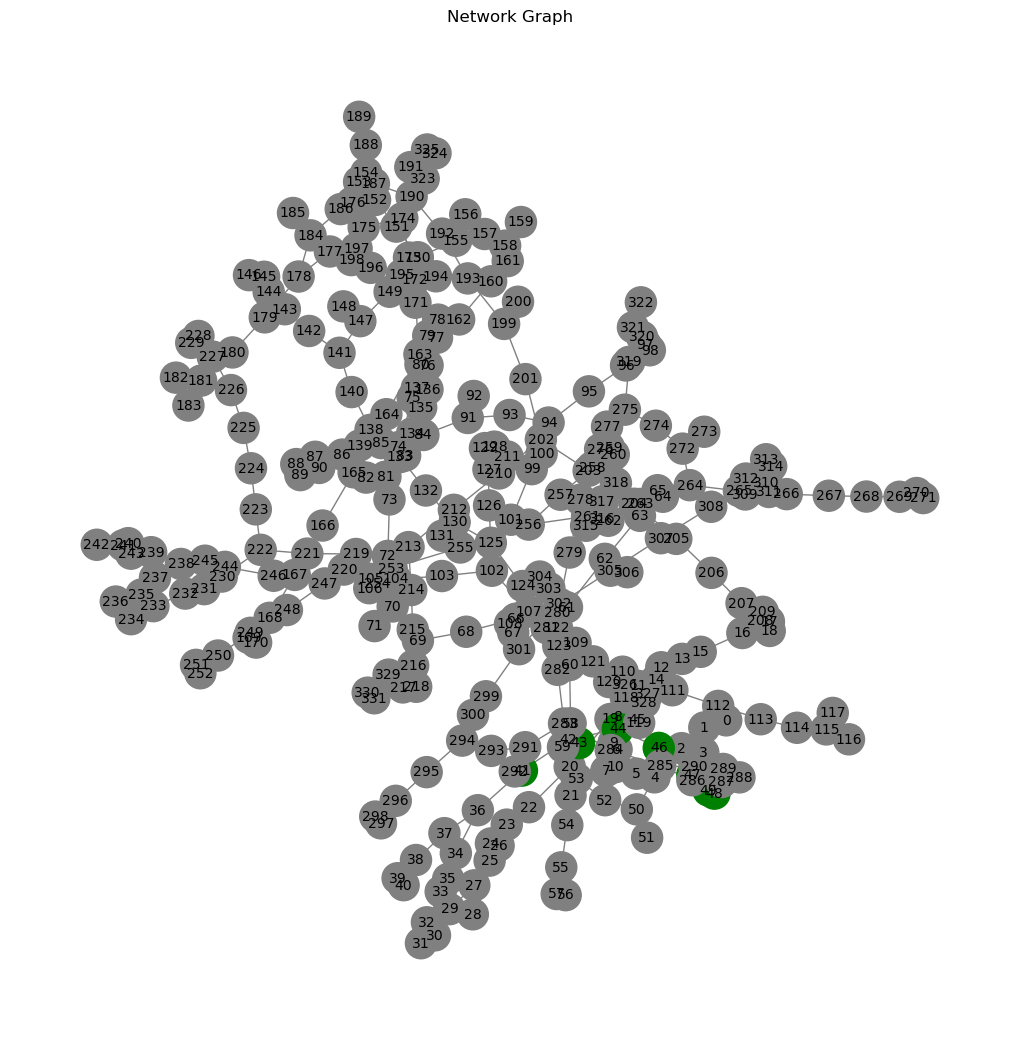

In [12]:
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color=lu['color'], edge_color='gray', node_size=lu['size'], font_size=10)
plt.title("Network Graph")
plt.show()

In [13]:
result_ablation = find_groups(G, 20, lu, ablation_mode=True)
result_ablation

100%|██████████| 332/332 [00:24<00:00, 13.50it/s]


,rho,sigma,q,ranks,reference,subgroup
node,,,,,,
75,332,9,0.062486,"[(75, False), (76, False), (80, False), (74, F...","[75, 76, 80, 74, 77, 79, 73, 78, 81, 72, 70, 8...","[75, 76, 80, 74, 77, 79, 73, 78, 81]"
285,332,9,0.062486,"[(285, False), (286, False), (290, False), (28...","[285, 286, 290, 284, 287, 289, 283, 288, 291, ...","[285, 286, 290, 284, 287, 289, 283, 288, 291]"
126,332,6,0.051020,"[(126, False), (127, False), (125, False), (12...","[126, 127, 125, 128, 129, 130, 124, 122, 132, ...","[126, 127, 125, 128, 129, 130]"
106,332,6,0.051020,"[(106, False), (104, False), (105, False), (10...","[106, 104, 105, 103, 102, 107, 101, 99, 109, 1...","[106, 104, 105, 103, 102, 107]"
151,332,6,0.051020,"[(151, False), (152, False), (150, False), (15...","[151, 152, 150, 153, 154, 155, 149, 147, 157, ...","[151, 152, 150, 153, 154, 155]"
65,332,6,0.051020,"[(65, False), (63, False), (64, False), (62, F...","[65, 63, 64, 62, 61, 66, 60, 58, 68, 67, 53, 6...","[65, 63, 64, 62, 61, 66]"
134,332,6,0.051020,"[(134, False), (135, False), (133, False), (13...","[134, 135, 133, 136, 137, 138, 132, 130, 140, ...","[134, 135, 133, 136, 137, 138]"
1,332,6,0.051020,"[(1, False), (0, False), (2, False), (3, False...","[1, 0, 2, 3, 4, 50, 5, 6, 52, 51, 53, 8, 7, 9,...","[1, 0, 2, 3, 4, 50]"
321,332,6,0.051020,"[(321, False), (322, False), (319, False), (32...","[321, 322, 319, 320, 275, 276, 274, 272, 278, ...","[321, 322, 319, 320, 275, 276]"


In [14]:
from ablation_metrics import compare_subgroups

comparison = compare_subgroups(result, result_ablation, k=10)
comparison

{'avg_q_normal': 0.21511850268144275,
 'avg_q_ablation': 0.0533131236374834,
 'avg_ref_size_normal': 12.2,
 'avg_ref_size_ablation': 332.0,
 'avg_sub_size_normal': 6.4,
 'avg_sub_size_ablation': 6.6,
 'avg_subgroup_overlap': 0.0}

In [15]:
from ablation_metrics import evaluate_pattern_subgroups

mean_ratio_normal, dist_ratios_normal = evaluate_pattern_subgroups(result, lu, k=10)
mean_ratio_ablation, dist_ratios_ablation = evaluate_pattern_subgroups(result_ablation, lu, k=10)

print("Avg fraction of target=1 in top-10 normal subgroups: ", mean_ratio_normal)
print("Avg fraction of target=1 in top-10 ablation subgroups:", mean_ratio_ablation)

Avg fraction of target=1 in top-10 normal subgroups:  0.3155877455877456
Avg fraction of target=1 in top-10 ablation subgroups: 0.0


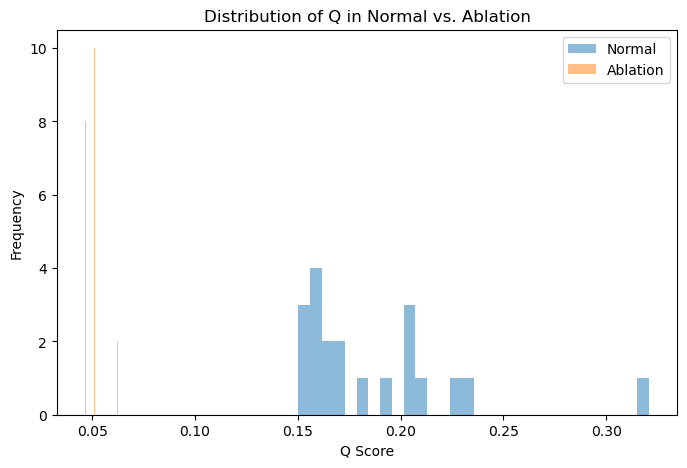

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(result['q'], bins=30, alpha=0.5, label='Normal')
plt.hist(result_ablation['q'], bins=30, alpha=0.5, label='Ablation')
plt.xlabel('Q Score')
plt.ylabel('Frequency')
plt.title('Distribution of Q in Normal vs. Ablation')
plt.legend()
plt.show()